In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [4]:
# read the dataset
df = pd.read_csv("Cricket.csv", sep=",", encoding="ISO-8859-1", header=0)
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [5]:
req_df = df[['Ave','SR']]
req_df

,Ave,SR
0,44.83,86.23
1,41.98,78.86
2,42.03,80.39
3,32.36,91.20
4,33.37,78.96
...,...,...
74,45.03,64.92
75,43.40,73.75
76,35.36,76.98
77,39.75,92.44


In [6]:
req_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ave     79 non-null     float64
 1   SR      79 non-null     float64
dtypes: float64(2)
memory usage: 1.4 KB


In [7]:
round(100*(req_df.isnull().sum())/len(df), 2)

Ave    0.0
SR     0.0
dtype: float64

In [8]:
# instantiate
from sklearn import preprocessing
scaler = StandardScaler()

# fit_transform
req_df_scaled = scaler.fit_transform(req_df)
req_df_scaled.shape

(79, 2)

In [9]:
req_df_scaled = pd.DataFrame(req_df_scaled)
req_df_scaled.columns = ['Ave','SR']
req_df_scaled.head()

,Ave,SR
0,1.072294,0.703152
1,0.587725,-0.044139
2,0.596226,0.110997
3,-1.047909,1.207091
4,-0.876185,-0.034000


In [12]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=3, max_iter=50 , random_state=100)
kmeans.fit(req_df_scaled)

KMeans(max_iter=50, n_clusters=3, random_state=100)

In [13]:
kmeans.labels_

array([0, 0, 0, 2, 1, 1, 0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 1,
       1, 1, 2, 0, 1, 2, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1], dtype=int32)

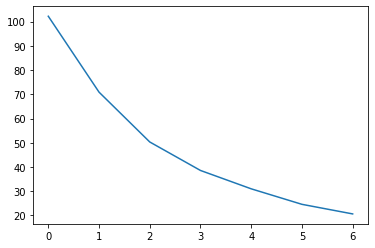

In [14]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(req_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [15]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(req_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(req_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.37632823237612395
For n_clusters=3, the silhouette score is 0.37047300011047957
For n_clusters=4, the silhouette score is 0.3836904829421138
For n_clusters=5, the silhouette score is 0.3707423974593574
For n_clusters=6, the silhouette score is 0.39076607561074883
For n_clusters=7, the silhouette score is 0.38301845780271
For n_clusters=8, the silhouette score is 0.38918689281599034


In [18]:
# final model with k=3
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(req_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [19]:
kmeans.labels_

array([2, 3, 3, 0, 1, 3, 3, 3, 3, 3, 3, 3, 0, 2, 1, 2, 1, 3, 3, 3, 0, 3,
       1, 3, 0, 2, 1, 0, 1, 3, 1, 1, 3, 1, 2, 1, 1, 3, 2, 3, 1, 1, 2, 1,
       1, 1, 3, 1, 1, 3, 0, 3, 1, 1, 1, 1, 3, 0, 1, 0, 1, 0, 3, 2, 2, 3,
       3, 1, 3, 1, 3, 1, 1, 1, 3, 3, 1, 0, 1], dtype=int32)

In [26]:
# assign the label
df['cluster_id'] = kmeans.labels_


In [30]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [31]:
print(df)

                         Player       Span  Mat  Inns  NO   Runs    HS    Ave  \
0          SR Tendulkar (INDIA)  1989-2012  463   452  41  18426  200*  44.83   
1   KC Sangakkara (Asia/ICC/SL)  2000-2015  404   380  41  14234   169  41.98   
2          RT Ponting (AUS/ICC)  1995-2012  375   365  39  13704   164  42.03   
3       ST Jayasuriya (Asia/SL)  1989-2011  445   433  18  13430   189  32.36   
4    DPMD Jayawardene (Asia/SL)  1998-2015  448   418  39  12650   144  33.37   
..                          ...        ...  ...   ...  ..    ...   ...    ...   
74            CG Greenidge (WI)  1975-1991  128   127  13   5134  133*  45.03   
75          Misbah-ul-Haq (PAK)  2002-2015  162   149  31   5122   96*  43.40   
76         PD Collingwood (ENG)  2001-2011  197   181  37   5092  120*  35.36   
77              A Symonds (AUS)  1998-2009  198   161  33   5088   156  39.75   
78      Abdul Razzaq (Asia/PAK)  1996-2011  265   228  57   5080   112  29.70   

       BF     SR  100  50  